<a href="https://colab.research.google.com/github/tosincarik/Tee-Data-Portfolio/blob/main/PredictChanceAdmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project is to predict the chance of admission into university for students factoring some independent variables like;

* Gre Score
* University Rating
* SOP (Statement of Purpose)
* TOEFL score
* University Rating
* LOR (Letter of Recommendation)
* CGPA
* Research


 The Chance of admit represents the dependent variable which the model will try to preict

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip  install opendatasets
!pip install pandas

In [ ]:
!pip install kaggle

In [4]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
cp kaggle.json ~/.kaggle/

In [6]:
import opendatasets as od

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download akshaydattatraykhare/data-for-admission-in-the-university

data-for-admission-in-the-university.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
! unzip data-for-admission-in-the-university

Archive:  data-for-admission-in-the-university.zip
replace adm_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
df_adm = pd.read_csv('adm_data.csv')

In [11]:
## Check if there are any missing values in the dataset

df_adm.isnull().values.any()

False

In [12]:
df_adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


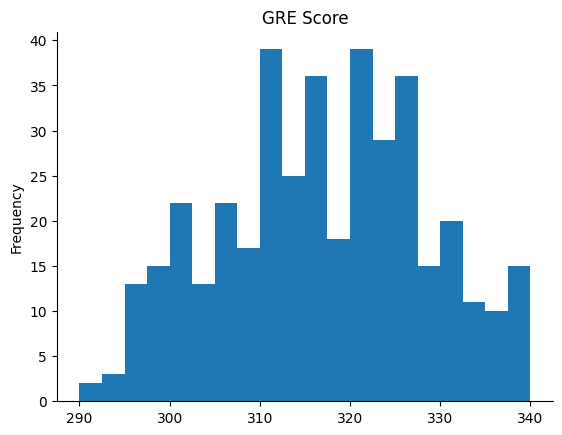

In [13]:
# @title GRE Score

from matplotlib import pyplot as plt
df_adm['GRE Score'].plot(kind='hist', bins=20, title='GRE Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
df_adm.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [15]:
## Split the dataset and fetch the independent variables into X
X = df_adm.iloc[:, 1:-1].values
y = df_adm.iloc[:,-1].values

In [16]:
#Split the dataset into training and test sets
#Using scikit learn library , import the train test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
print(X_test)

### **Multiple Linear Regression**

In [18]:
#Import the linearregression object and create an instance of the object
#Train the multiple linear regression on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

##Predictor for Linear Regression

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
print(y_pred)

[0.69791327 0.69343926 0.77882728 0.61577391 0.72281999 0.60286273
 0.7067783  0.64104331 0.87037545 0.91874738 0.53830841 0.88537227
 0.70839345 0.45744365 0.85464724 0.62329657 0.63034415 0.81411912
 0.58479826 0.73198733 0.8755188  0.8436008  0.65964574 0.45723204
 0.78390781 0.58302231 0.49932541 0.64153708 0.88778116 0.64950902
 0.64065401 0.74057509 0.74268991 0.55702869 0.78303581 0.77159575
 0.65140153 0.86244822 0.63038997 0.92925287 0.72728695 0.67164181
 0.70967833 0.80792068 0.8242496  0.6540426  0.56311848 0.69211512
 0.60750179 0.60172386 0.67514274 0.80138513 0.65205933 0.87968402
 0.72302425 0.75457701 0.70602419 0.73465988 0.75784394 0.82956036
 0.77359675 0.47343091 0.63752277 0.52286953 0.84258874 0.82142312
 0.73664582 0.86699812 0.76933952 0.75453984 0.59900479 0.82915301
 0.82822468 0.60736795 0.93236783 0.63445628 0.63728309 0.64518748
 0.90854935 0.51460138]


In [21]:
print(y_test)

[0.71 0.7  0.79 0.73 0.72 0.48 0.77 0.71 0.9  0.94 0.58 0.89 0.72 0.57
 0.78 0.42 0.64 0.84 0.63 0.72 0.9  0.83 0.57 0.47 0.85 0.67 0.44 0.54
 0.92 0.62 0.68 0.73 0.73 0.61 0.55 0.74 0.64 0.89 0.73 0.95 0.71 0.72
 0.75 0.76 0.86 0.7  0.39 0.79 0.61 0.64 0.71 0.8  0.61 0.89 0.68 0.79
 0.78 0.52 0.76 0.88 0.74 0.49 0.65 0.59 0.87 0.89 0.81 0.9  0.8  0.76
 0.68 0.87 0.68 0.64 0.91 0.61 0.69 0.62 0.93 0.43]


In [ ]:
# Comparing the results of the predicted chance of admit with the actual(real) chance of admit test set
# Set to display only in two decimal places
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1) , y_test.reshape(len(y_test),1)),1))

##Accuracy Score

In [23]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.6537876123347577

## Polynomial Regression

In [24]:
#convert the matrix of features of X to a polynomial matrix
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree=3)
pol_reg.fit_transform(X)
X_Pol = pol_reg.fit_transform(X)
pol_reg2 = LinearRegression()
pol_reg2.fit(X_Pol,y)

LinearRegression()

##Predictor for PolyRegression

In [25]:
y_pred = pol_reg2.predict(X_Pol)

In [ ]:
# Comparing the results of the predicted chance of admit with the actual(real) chance of admit test set
# Set to display only in two decimal places
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1) , y.reshape(len(y),1)),1))

In [27]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.8506760989774554

## Conclusion
---
With multiple linear regression model, the accuracy for prediction was at 0.65%, this model was improved by using the polynimial regression and a degree of 2. This greatly improved the accuracy to 0.85% prediction accuracy for the chance of admission to the university.

